# **LOAD DATA**

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


# Load dataset
df = pd.read_excel('stunting.xlsx')
print(df.head())

   Age  Weight  Height           TB/U Gender Birth Weight Birth Height
0   33    11.0    84.0         Pendek      L           3           48 
1   37    10.0    87.0         Pendek      L         3.1           50 
2   10     6.4    67.0         Pendek      P           3           48 
3    1     3.3    49.0  Sangat Pendek      P        2.95           47 
4   50    13.7    89.0  Sangat Pendek      P           3           49 


In [15]:
# Pengecekan Missing Value
missing_values = df.isnull().sum()
print("Missing Values per Kolom:")
print(missing_values)


Missing Values per Kolom:
Age               0
Weight            0
Height            0
TB/U              0
Gender            0
Birth Weight      0
Birth Height      0
gender_encoded    0
dtype: int64


In [2]:
# Melihat informasi DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           193 non-null    int64  
 1   Weight        193 non-null    float64
 2   Height        193 non-null    float64
 3   TB/U          193 non-null    object 
 4   Gender        193 non-null    object 
 5   Birth Weight  193 non-null    object 
 6   Birth Height  193 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.7+ KB
None


# **ENCODE**

In [3]:
# Step 2: Encode categorical target variable

label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Age,Weight,Height,TB/U,Gender,Birth Weight,Birth Height,gender_encoded
0,33,11.0,84.0,Pendek,L,3,48,0
1,37,10.0,87.0,Pendek,L,3.1,50,0
2,10,6.4,67.0,Pendek,P,3,48,1
3,1,3.3,49.0,Sangat Pendek,P,2.95,47,1
4,50,13.7,89.0,Sangat Pendek,P,3,49,1


# **Exploratory Data Analysis (EDA)**

Pie Chart Kelas Stunting dan Normal

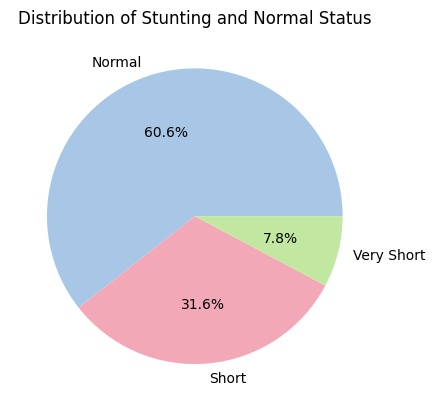

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Clean column names to remove any extra spaces
df.columns = df.columns.str.strip()

# Rename stunting status values in 'TB/U' column from Indonesian to English
df['TB/U'] = df['TB/U'].replace({
    'Pendek': 'Short',
    'Sangat Pendek': 'Very Short'
})

# Count the occurrences of each stunting status ('TB/U')
stunting_counts = df['TB/U'].value_counts()

# Create a pie chart to visualize the distribution of each stunting category
plt.pie(stunting_counts, labels=stunting_counts.index, autopct='%1.1f%%', colors=['#a8c7e6', '#f3a8b8', '#c2e7a1'])

# Add title
plt.title('Distribution of Stunting and Normal Status')

# Display the chart
plt.show()


Histogram Fitur Terpilih

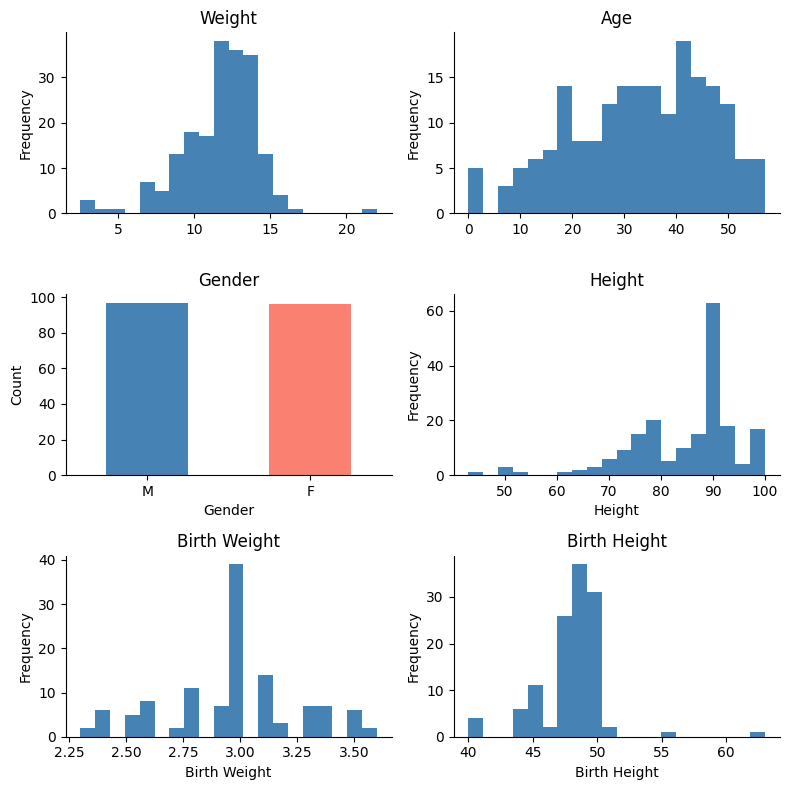

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya df sudah didefinisikan sebelumnya
# Pastikan kolom-kolom yang perlu dikonversi ke numerik
# Pastikan kolom-kolom ini ada dan tipe datanya sesuai
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Birth Weight'] = pd.to_numeric(df['Birth Weight'], errors='coerce')
df['Birth Height'] = pd.to_numeric(df['Birth Height'], errors='coerce')

# Tentukan ukuran gambar untuk grid plot
plt.figure(figsize=(8, 8))

# Plot 1: Weight (kg)
plt.subplot(3, 2, 1)
df['Weight'].plot(kind='hist', bins=20, title='Weight', color='steelblue')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot 2: Age (months)
plt.subplot(3, 2, 2)
df['Age'].plot(kind='hist', bins=20, title='Age', color='steelblue')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot 3: Gender distribution
# Menambahkan plot Gender distribution
plt.subplot(3, 2, 3)
df['gender_encoded'].value_counts().plot(kind='bar', title='Gender', color=['steelblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['M', 'F'], rotation=0)  # Menggunakan 'M' dan 'F'
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot 4: Height (cm)
plt.subplot(3, 2, 4)
plt.hist(df['Height'], bins=20, color='steelblue')
plt.title('Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot 5: Birth Weight (kg)
plt.subplot(3, 2, 5)
plt.hist(df['Birth Weight'], bins=20, color='steelblue')
plt.title('Birth Weight')
plt.xlabel('Birth Weight')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot 6: Birth Height (cm)
plt.subplot(3, 2, 6)
plt.hist(df['Birth Height'], bins=20, color='steelblue')
plt.title('Birth Height')
plt.xlabel('Birth Height')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Menampilkan plot
plt.tight_layout()
plt.show()


Perbandingan Frekuensi EDA

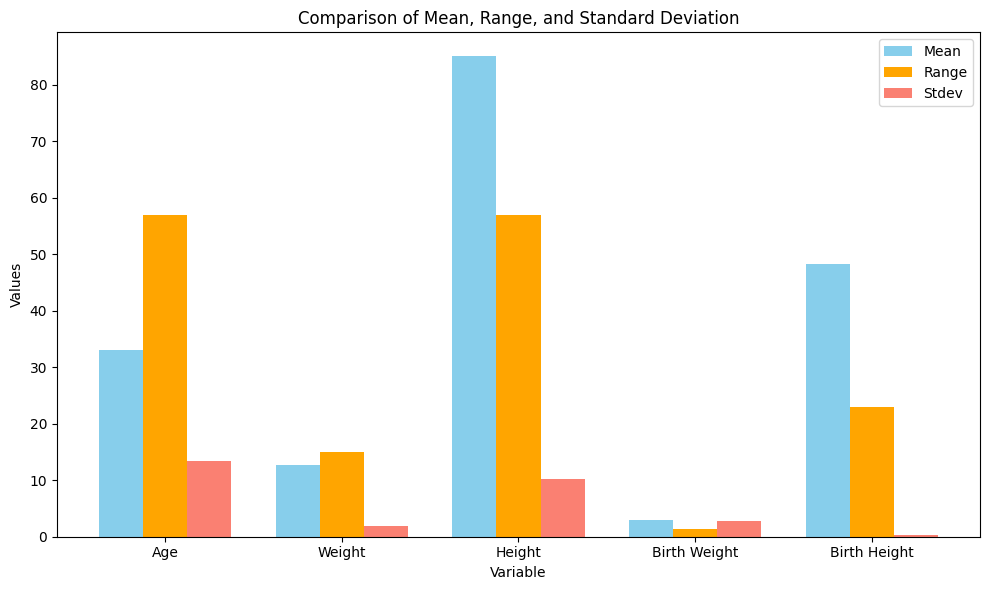

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data dari tabel (dalam bentuk dictionary)
data = {
    'Variable': ['Age', 'Weight', 'Height', 'Birth Weight', 'Birth Height'],
    'Mean': [32.98, 12.63, 84.98, 2.97, 48.16],
    'Range': [57, 15, 57, 1.3, 23],
    'Stdev': [13.43, 1.96, 10.26, 2.76, 0.29]
}

# Mengubah data menjadi format yang lebih mudah divisualisasikan
variables = data['Variable']
mean_values = data['Mean']
range_values = data['Range']
stdev_values = data['Stdev']

# Membuat bar chart untuk Mean, Range, dan Stdev
fig, ax = plt.subplots(figsize=(10, 6))

# X axis untuk variabel
x = np.arange(len(variables))

# Lebar bar
bar_width = 0.25

# Menambahkan bar untuk Mean, Range, dan Stdev
bar1 = ax.bar(x - bar_width, mean_values, bar_width, label='Mean', color='skyblue')
bar2 = ax.bar(x, range_values, bar_width, label='Range', color='orange')
bar3 = ax.bar(x + bar_width, stdev_values, bar_width, label='Stdev', color='salmon')

# Menambahkan label dan judul
ax.set_xlabel('Variable')
ax.set_ylabel('Values')
ax.set_title('Comparison of Mean, Range, and Standard Deviation')

# Menambahkan label pada X-axis
ax.set_xticks(x)
ax.set_xticklabels(variables)

# Menambahkan legenda
ax.legend()

# Menata tata letak agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


# **Normalisasi & Pemilihan Fitur X,y**

In [4]:
# Step 3: Define features and target
X = df[['Age', 'Weight', 'Height', 'gender_encoded', 'Birth Weight', 'Birth Height']]
y = df['TB/U']

In [5]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **SKENARIO SPLIITING DATA**

### split 60:40

In [6]:
# Langkah 2: Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

### split 70:30

In [32]:
# Langkah 2: Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### split 80:20

In [ ]:
# Langkah 2: Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### split 90:10

In [36]:
# Langkah 2: Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# **SMOTE**

In [7]:
# Tentukan SMOTE dengan sampling_strategy
smote = SMOTE(random_state=42, sampling_strategy='auto')  # 'auto' menyeimbangkan jumlah kelas minoritas dan mayoritas
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Setelah SMOTE

Distribusi kelas sebelum SMOTE:
TB/U
Normal           70
Pendek           36
Sangat Pendek     9
Name: count, dtype: int64
Distribusi kelas setelah SMOTE:
TB/U
Pendek           70
Normal           70
Sangat Pendek    70
Name: count, dtype: int64


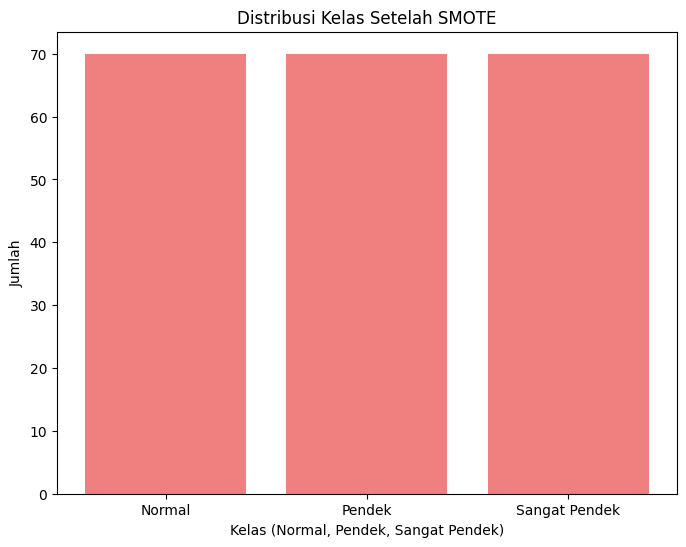

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Cek distribusi kelas sebelum dan sesudah SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y_train.value_counts())

print("Distribusi kelas setelah SMOTE:")
print(y_resampled.value_counts())

# Cek distribusi kelas setelah SMOTE
class_counts_resampled = Counter(y_resampled)

# Visualisasi distribusi kelas menggunakan bar plot setelah SMOTE
plt.figure(figsize=(8, 6))
plt.bar(class_counts_resampled.keys(), class_counts_resampled.values(), color='lightcoral')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Kelas (Normal, Pendek, Sangat Pendek)')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['Normal', 'Pendek', 'Sangat Pendek'], rotation=0)
plt.show()

# **TRAIN MODEL KNN DAN NB**

## K-Nearest Neighbor (KNN) (dengan Tuning Hyperparameter)


Best Parameters Found:
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
--- Hasil Performance KNN ---

Accuracy: 83.33%
Precision: 83.44%
Recall: 83.33%
F1 Score: 83.37%

Hasil Classification KNN:
               precision    recall  f1-score   support

       Normal       0.89      0.87      0.88        47
       Pendek       0.81      0.84      0.82        25
Sangat Pendek       0.50      0.50      0.50         6

     accuracy                           0.83        78
    macro avg       0.73      0.74      0.74        78
 weighted avg       0.83      0.83      0.83        78

Confusion Matrix:
[[41  4  2]
 [ 3 21  1]
 [ 2  1  3]]


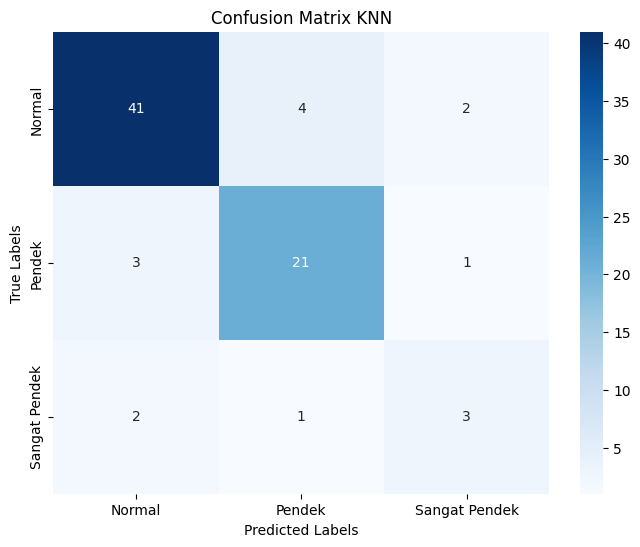

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Tuning Hyperparameter KNN
param_grid_knn = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'canberra']
}


grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_resampled, y_resampled)
best_knn = grid_search_knn.best_estimator_

# Print the best parameters found
print("\nBest Parameters Found:")
print(grid_search_knn.best_params_)
# Prediksi dengan Model KNN
y_pred_knn = best_knn.predict(X_test)

# Evaluasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# Output KNN
print("--- Hasil Performance KNN ---\n")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Precision: {precision_knn * 100:.2f}%")
print(f"Recall: {recall_knn * 100:.2f}%")
print(f"F1 Score: {f1_knn * 100:.2f}%\n")
print("Hasil Classification KNN:")
print(classification_report(y_test, y_pred_knn, target_names=['Normal', 'Pendek', 'Sangat Pendek']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pendek', 'Sangat Pendek'], yticklabels=['Normal', 'Pendek', 'Sangat Pendek'])
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Naive Bayes (NB)

--- Hasil Performance Naive Bayes ---
Accuracy: 73.08%
Precision: 71.63%
Recall: 73.08%
F1 Score: 70.98%

Hasil Classification Naive Bayes:
               precision    recall  f1-score   support

       Normal       0.77      0.94      0.85        47
       Pendek       0.69      0.44      0.54        25
Sangat Pendek       0.40      0.33      0.36         6

     accuracy                           0.73        78
    macro avg       0.62      0.57      0.58        78
 weighted avg       0.72      0.73      0.71        78

Confusion Matrix Naive Bayes:
[[44  3  0]
 [11 11  3]
 [ 2  2  2]]


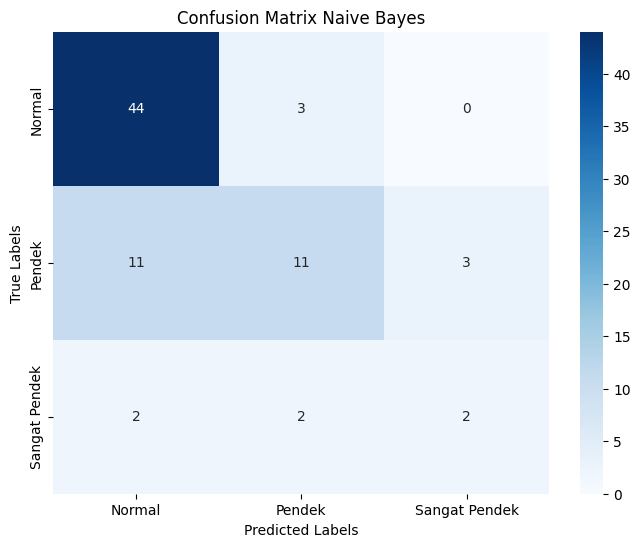

In [12]:
# 2. Model Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi dengan Naive Bayes
y_pred_nb = nb.predict(X_test)

# Evaluasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=0)

# Output hasil evaluasi Naive Bayes
print("--- Hasil Performance Naive Bayes ---")
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print(f"Precision: {precision_nb * 100:.2f}%")
print(f"Recall: {recall_nb * 100:.2f}%")
print(f"F1 Score: {f1_nb * 100:.2f}%\n")
print("Hasil Classification Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

# Confusion Matrix untuk Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Visualisasi Confusion Matrix Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pendek', 'Sangat Pendek'],
            yticklabels=['Normal', 'Pendek', 'Sangat Pendek'])
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()